In [1]:
from sklearn.cluster import KMeans
import numpy as np, pandas as pd, cv2
import matplotlib.pyplot as plt

In [102]:
im = cv2.imread('image.jpg')
im.shape

(183, 275, 3)

In [3]:
cv2.imshow("Title", im)
cv2.waitKey(0)
cv2.destroyAllWindows()

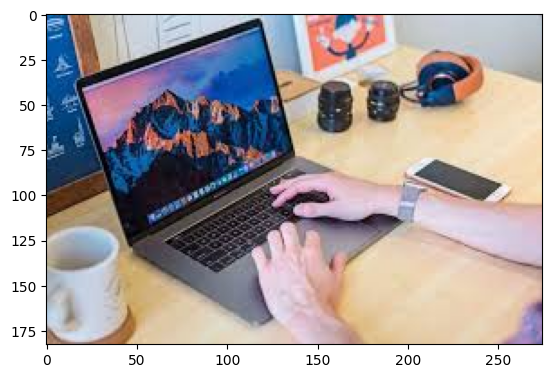

In [4]:
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [5]:
all_pixels = im.reshape((-1, 3))
all_pixels.shape

(50325, 3)

In [6]:
all_pixels

array([[170,  97,  29],
       [180, 111,  32],
       [181, 114,  15],
       ...,
       [166, 107, 121],
       [168, 107, 117],
       [169, 106, 116]], dtype=uint8)

In [7]:
dominant_clusters=4
km = KMeans(n_clusters=dominant_clusters, n_init='auto')
km.fit(all_pixels)

KMeans(n_clusters=4, n_init='auto')

In [8]:
print(km.cluster_centers_)
print(km.inertia_)

[[129.11564132  89.08139872  59.45037725]
 [192.26235389 203.93522773 220.34042725]
 [138.64666795 141.69645609 169.64377889]
 [ 47.40708824  34.94101226  34.13970142]]
91220188.48089969


In [11]:
centers = np.array(km.cluster_centers_, dtype='uint8')
centers

array([[129,  89,  59],
       [192, 203, 220],
       [138, 141, 169],
       [ 47,  34,  34]], dtype=uint8)

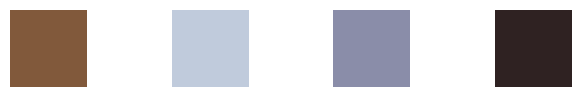

In [80]:
plt.figure(0, figsize=(8,1))
i = 1
colors = []
for c in centers:
    plt.subplot(1, 4, i)
    plt.axis("off")
    i+=1
    colors.append(c)
    a = np.zeros((100, 100, 3), dtype='uint8')
    a[:,:,:] = c
    plt.imshow(a)
plt.show()

In [81]:
np.unique(km.labels_)

array([0, 1, 2, 3])

In [93]:
m, n = all_pixels.shape
a = np.zeros((m, n))
for ix in range(m):
    a[ix] = colors[km.labels_[ix]]

a.shape

(50325, 3)

In [94]:
km.labels_.shape

(50325,)

In [103]:
a = a.reshape((-1,275,3))
a = np.asarray(a, 'uint8')

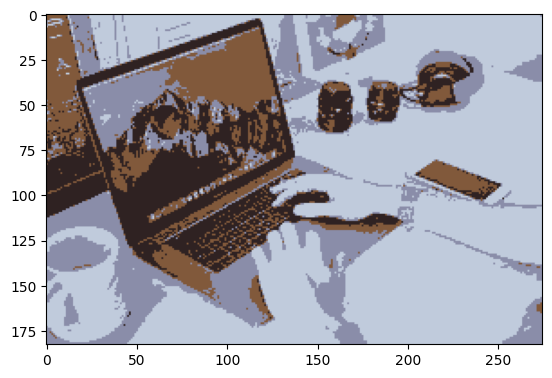

In [96]:
plt.imshow(a)
plt.show()

In [97]:
np.unique(a, return_counts=True)

(array([ 34,  47,  59,  89, 129, 138, 141, 169, 192, 203, 220], dtype=uint8),
 array([16434,  8217,  6928,  6928,  6928, 10396, 10396, 10396, 24784,
        24784, 24784], dtype=int64))

In [98]:
import copy
def pickOne(k):
    ap = copy.deepcopy(a)
    ap = ap.reshape((-1, 3))
    print(k)
    black = np.array([0,0,0])
    for ix in range(m):
        condition = np.any(ap[ix] != k)
        if condition:
            ap[ix] = black
    ap = ap.reshape((-1,275,3))
    ap = np.asarray(ap, dtype='uint8')
    plt.imshow(ap)
    plt.show()

[129  89  59]


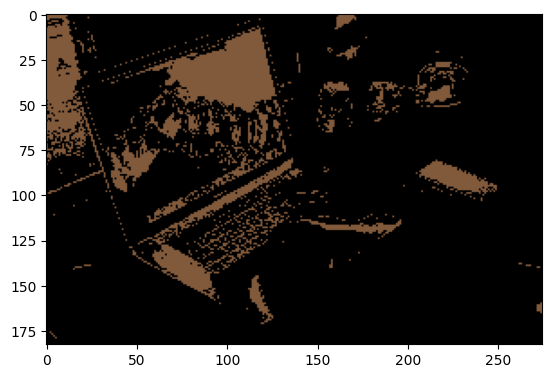

[192 203 220]


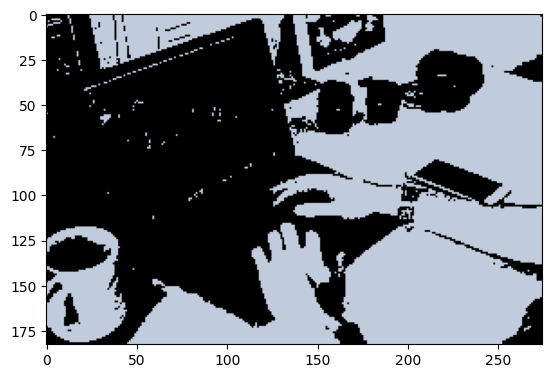

[138 141 169]


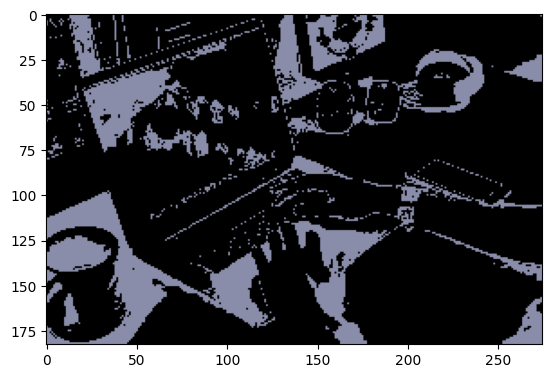

[47 34 34]


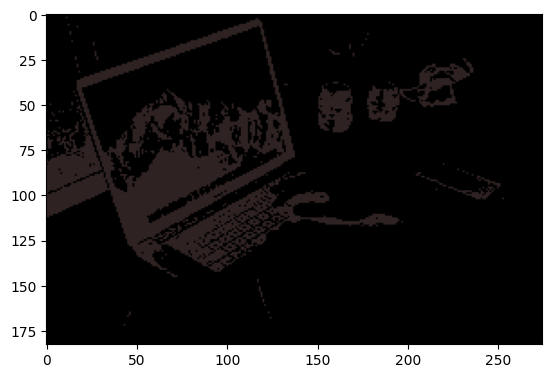

In [99]:
for c in range(len(colors)):
    pickOne(colors[c])

In [89]:
colors

[array([129,  89,  59], dtype=uint8),
 array([192, 203, 220], dtype=uint8),
 array([138, 141, 169], dtype=uint8),
 array([47, 34, 34], dtype=uint8)]